<a href="https://colab.research.google.com/github/steverogersneha/Iris-Neural-Network/blob/master/Copy_of_02_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image classification with Keras

In this tutorial, we will create a very basic neural network for image classification in Keras. 

We will use the dataset with images of clothing and try to automatically classify them in classes (clothing types).

In this tutorial, we will:
- Download and review the dataset
- Preprocessed the data
- Build the classification model
- Train the model
- Evaluate the model and observe the results

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)
print(tf.config.list_physical_devices('GPU'))

2.8.0
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


## The dataset

This tutorial uses [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist) dataset. The dataset contains 70,000 images of clothing.

![](https://tensorflow.org/images/fashion-mnist-sprite.png)




This dataset is available through `keras.datasets` module and is already split on training and testing dataset.

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


## Review the dataset

We will first check the size of the dataset.

In [3]:
train_images.shape, train_labels.shape, test_images.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))


How does one image look?

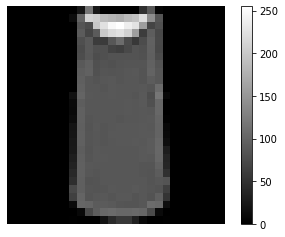

In [4]:
plt.imshow(train_images[2], cmap='gray')
plt.axis('off')
plt.colorbar();  # 2

What about labels? We plot labels for ten first image in the dataset.

In [5]:
train_labels[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

We see that labels are numbers. Each category is represented with its number. 
For labelling purposes, we crate the list of labels which indexes correspond to numbers in the list above.

In [6]:
class_names = [
    'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
    'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'
]

## Preprocess images

Data must be preprocessed before training the neural network, which improves the learning process. More about reasons for preprocessing can be found [here](https://machinelearningmastery.com/how-to-improve-neural-network-stability-and-modeling-performance-with-data-scaling/)

In [7]:
train_images_preprocessed = train_images / 255
test_images_preprocessed = test_images / 255

Now we inspect whether images are correctly preprocessed.

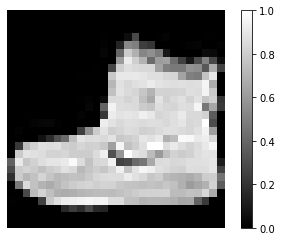

In [8]:
plt.imshow(train_images_preprocessed[0], cmap='gray')
plt.colorbar() 
plt.axis('off'); 

## Building the model

We will first chose and connect layers and then compile the model to make it ready for training.

We decided to make our network simple. It will have only two dense layers.

![](https://victorzhou.com/media/nn-series/network.svg)

In [9]:
model = keras.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

Flatten layer transform each image with size 28 x 28 pixels to vector (onedimensional array) with 28x28 = 784 elements. Dense layers are fully connected layers, first has 128 nodes, and the second one has 10 nodes that correspond to 10 classes in data. Each node will contain a score for each of the classes.

To be able to train the model, we need to add a few more settings to it:

In [10]:
model.compile(
    optimizer='adam',
    loss=keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

- loss: It sets the loss function that is a measurement of accuracy during training. The network is optimized such that it minimizes the loss function.
- optimizer: The method for optimizing the model during training
- metrics: The measurement to monitor the performance of the neural network. In this example, we use accuracy, which measures the proportion of correctly classified images.

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


## Training the model

We will use the training part of the dataset to train the model

In [12]:
history = model.fit(
    train_images_preprocessed, 
    train_labels, 
    validation_split=0.1,
    epochs=10
)

Epoch 1/10
1688/1688 [==============================] - 9s 4ms/step - loss: 0.5126 - accuracy: 0.8197 - val_loss: 0.4450 - val_accuracy: 0.8308
Epoch 2/10
1688/1688 [==============================] - 6s 4ms/step - loss: 0.3795 - accuracy: 0.8633 - val_loss: 0.3802 - val_accuracy: 0.8625
Epoch 3/10
1688/1688 [==============================] - 8s 5ms/step - loss: 0.3409 - accuracy: 0.8747 - val_loss: 0.3544 - val_accuracy: 0.8673
Epoch 4/10
1688/1688 [==============================] - 9s 5ms/step - loss: 0.3153 - accuracy: 0.8850 - val_loss: 0.3282 - val_accuracy: 0.8837
Epoch 5/10
1688/1688 [==============================] - 6s 4ms/step - loss: 0.2984 - accuracy: 0.8905 - val_loss: 0.3627 - val_accuracy: 0.8702
Epoch 6/10
1688/1688 [==============================] - 8s 5ms/step - loss: 0.2827 - accuracy: 0.8959 - val_loss: 0.3309 - val_accuracy: 0.8822
Epoch 7/10
1688/1688 [==============================] - 6s 4ms/step - loss: 0.2689 - accuracy: 0.9010 - val_loss: 0.3252 - val_accuracy:

# Model evaluation and predicting

We want to know how accurate is the model we trained on the test data. 

In [13]:
test_loss, test_acc = model.evaluate(test_images_preprocessed, test_labels)

print('\nTest accuracy:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.3719 - accuracy: 0.8754

Test accuracy: 0.8754000067710876


To make a prediction, we will add the Softmax layer to the model. This layer changes the linear prediction of the last model to probabilities.

In [14]:
predictions = model.predict(test_images_preprocessed)
predictions.shape

(10000, 10)

Let's take a look in the prediction for the first image.

In [15]:
np.set_printoptions(suppress=True)
predictions[0]

array([0.0000004 , 0.00000056, 0.0000001 , 0.00000041, 0.00000114,
       0.0017078 , 0.00000052, 0.04170777, 0.00000001, 0.95658135],
      dtype=float32)

The prediction is an array of 10 numbers, and each is the probability for one of ten classes. Now we will get the index of the class with the highest probability:

In [16]:
np.argmax(predictions[0])

9

And what is correct label for the first image?

In [17]:
test_labels[0]

9

To get the name of the class, we will use the previously defined `class_names` list:

In [18]:
class_names[np.argmax(predictions[0])]

'Ankle boot'

Here we implement two functions to show the results:

In [19]:
def plot_image(i, predictions, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions[i])
    color = 'blue' if predicted_label == true_label else 'red'
    
    plt.xlabel(
        "{} ({})".format( class_names[predicted_label], class_names[true_label]), 
        color=color
    )
                                
def plot_histogram(i, predictions, true_label):
    true_label = true_label[i]
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions[i], color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions[i])

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

Now we can use those function to inspect a few predictions visually:

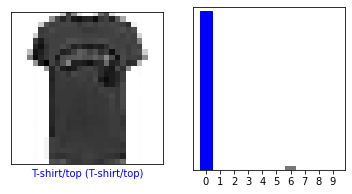

In [22]:
i = 19
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1, 2, 2)
plot_histogram(i, predictions, test_labels)

# Is the model trained enough?

We can plot the training and the test accuracy. We are overfitting the model on the training data when test accuracy does not improve anymore or even decrease.

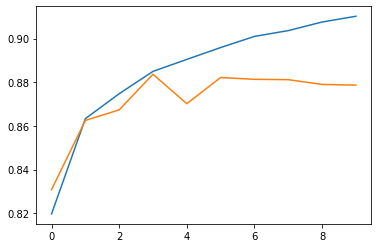

In [23]:
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Testing accuracy');